<a href="https://colab.research.google.com/github/Nahuelito22/ProyectoDS3_Nahuel_Ghilardi/blob/main/ProyectoDS3_Nahuel_Ghilardi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ajedrez


## Introducción  

### Descripcion del proyecto

Este proyecto utiliza técnicas avanzadas de Deep Learning y Procesamiento del Lenguaje Natural (NLP) para analizar partidas de ajedrez, con el objetivo de desarrollar un bot similar a Stockfish. El análisis incluye la identificación de aperturas más comunes, los movimientos más jugados y una exploración sobre quién tiene mayor tasa de victorias (blancas o negras). Además, se implementaron embeddings para representar las jugadas y visualizar patrones utilizando métodos como t-SNE.

Ademas buscamos crear una Red Neuronal Recurrente simple con el objetivo de probar si es posible predecir los siguientes mejores  movimientos o simplemente predecir el siguiente movimiento.

El dataset utilizado en este proyecto proviene de Hugging Face, específicamente desde el sitio oficial de Lichess, una plataforma líder en ajedrez en línea. Este conjunto de datos contiene más de 6 billones de partidas en formato PGN, proporcionando un recurso rico para el análisis y modelado.
De los cuales eh filtrado para obtener 1 millon de datos.

Esto puede sonar poco, pero nuestro filtrado se basa en el Elo.

El sistema de puntuación Elo es un método matemático, basado en cálculo estadístico, para calcular la habilidad relativa de los jugadores de disciplinas como el ajedrez.

Normalmente para que tengan una idea de esto las clasificaciones segun Elo son las siguientes:
* 0-1400 puntos: Nivel principiante
* 1400-1600 puntos: Nivel aficionado o de jugador de club medio
* 1600-2100 puntos: Nivel semiprofesional o de jugador de club fuerte
* 2600-2800 puntos: Nivel de élite

Tambien tenemos otras clasificaciones como:

* Principiante: Menos de 1000
* Novato/Aficionado: 1000 - 1399
* Jugador Intermedio: 1400 - 1599
* Jugador Competitivo/Avanzado: 1600 - 1999
* Experto: 2000 - 2199
* Maestro Nacional (Candidate Master, CM): 2200 - 2299
* Maestro FIDE (FM): 2300 - 2399
* Maestro Internacional (IM): 2400 - 2499
* Gran Maestro (GM): 2500 o más
* Super Gran Maestro (Super GM): 2700 o más

Como se observa un jugador de ajedrez cuando ya supera los 1800 puede decirse que es un jugador avanzado. Es por esta razon que eh filtrado la obtencion de datos desde 1800 puntos de Elo en adelante.
Asi que los datos con los que contamos se podria decir que provienen de jugadores de un alto nivel ajedrecístico.

### Motivacion

Como apasionado del ajedrez, aunque aún me considero un jugador novato, siempre me ha fascinado explorar el mundo detrás de cada partida: las aperturas, los patrones de juego y las decisiones estratégicas que marcan la diferencia. Al tener la oportunidad de realizar un proyecto para Coderhouse, me propuse combinar mi pasión por este juego milenario con los conocimientos adquiridos en el curso.

La idea central de este proyecto fue crear algo propio y único: un bot que no busque valoraciones complicadas ni intente replicar motores como Stockfish, sino que se enfoque en descubrir patrones de movimiento entre las jugadas, desmitificando el juego desde una perspectiva más simple pero igual de poderosa.

Además, este proyecto representa una forma de profundizar en mi aprendizaje, poner en práctica conceptos avanzados y desafiarme para ver hasta dónde puedo llegar en esta mezcla de ajedrez y tecnología.

### Objetivos

El objetivo principal de este proyecto es analizar patrones de movimiento en partidas de ajedrez utilizando técnicas de Procesamiento del Lenguaje Natural (NLP). Esto incluye:


1.   Identificación y análisis de patrones: Aplicar métodos de NLP para estudiar y comprender los patrones más comunes en las jugadas, explorando cómo se relacionan diferentes movimientos en una partida.


2.   Creación de embeddings personalizados: Diseñar un embedding propio que represente movimientos de ajedrez en notación algebraica, permitiendo captar relaciones y similitudes entre jugadas de forma eficiente.

3.   Predicción de la siguiente jugada: Implementar una red neuronal recurrente (RNN) sencilla que, al recibir una secuencia de jugadas (por ejemplo, e4, d4, Nc6), sea capaz de predecir cuál sería la siguiente jugada óptima o esperada dentro del contexto de la partida.



Con este enfoque, el proyecto busca aportar una herramienta innovadora que, sin valorar posiciones o incluir complejidades de un motor tradicional, ofrezca una perspectiva basada únicamente en patrones de movimiento y la lógica inherente al ajedrez.



Para que se entienda de manera mas didactita les brindo un ejemplo de una gran partida:

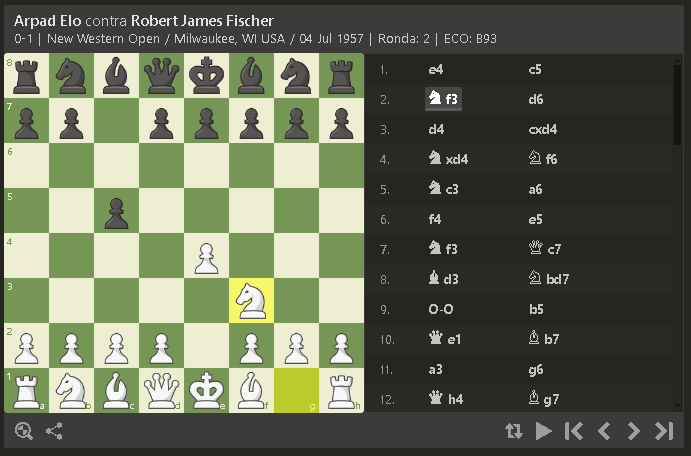

Como vemos a la derecha de la partida tenemos la notacion algebraica de movimientos, esot quiere decir que simplemente anotamos cada movimiento que vamos haciendo.

En este caso se ah jugado
1. e4 c5
2. f3 ???

La idea es que el modelo que creemos luego de analizar millones de jugadas pueda predecir el siguiente movimiento, que en este caso seria d6, pero pueden ser varios y eso es lo magico, que al tener un dataset de jugadas de alto nivel, el modelo va a tener la capacidad de capturar aquellos patrones complejos y que se podrian determinar como grandes movimientos.

## Subida de dataset desde Hugging Face - Lichess.org

El datasets que utilizamos para este analisis y modelo es de Hugging Face.

Estos datos estan subidos por Lichess.Org uno de los sitios web y aplicaciones con mas informacion,datos y partidas sobre ajedrez.

Consta con 6 billones de datos, los cuales filtramos para quedarnos con:

*  Resultado de las partidas.
*  Elo del jugador blanco.
*  Elo del jugador negro.
*  ECO (Enciclopedia de aperturas de Ajedrez), este dato es importante para conocer que aperturas son mas utilizadas y como las partidas dependen de su inicio.
*  Opening: Esto representa la apertura jugada.
* movetext: Representa la partida de ajedrez en notacion algebraica.

Para visualizar la estructura completa del dataset o cualquier utilidad que se le pueda dar este es su sitio:


[Lichess/standard-chess-games](https://huggingface.co/datasets/Lichess/standard-chess-games)

Instalamos dependencias correspondientes para el uso de la interface de datos de Hugging Face con colab

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


Importamos modulos ya instalados

In [ ]:
from datasets import load_dataset

Ahora para el manejo de datos extraidos de la base de datos vamos a hacer uso de librerias

In [ ]:
# Importamos librerias necesarias
import pandas as pd
import numpy as np

Hacemos un streaming del dataset, esto significa que para no descargar directamente vamos iterando fila por fila desde el dataset en la nube y con los filtros seleccionados nos quedamos con nuestros datos.

In [ ]:
# Configuración inicial
TARGET_COUNT = 1000000  # Número total de registros válidos deseados
SAVE_INTERVAL = 100000  # Guardar cada 100,000 registros
OUTPUT_FILE = "filtered_data.csv"  # Archivo de salida
TEMP_FILE = "filtered_data_temp.csv"  # Archivo temporal

# Cargar el dataset en streaming
dataset = load_dataset("Lichess/standard-chess-games", split="train", streaming=True)

# Lista para almacenar registros temporalmente
filtered_data = []
total_saved = 0  # Contador para los registros guardados

# Crear encabezado en el archivo de salida
with open(OUTPUT_FILE, "w", encoding="utf-8") as f:
    f.write("Result,WhiteElo,BlackElo,ECO,Opening,movetext\n")

# Procesar el dataset
for i, row in enumerate(dataset):
    if total_saved >= TARGET_COUNT:  # Detenerse cuando se alcance el objetivo
        break

    try:
        # Filtrar registros válidos
        white_elo = int(row.get("WhiteElo", 0) or 0)  # Manejar valores faltantes
        black_elo = int(row.get("BlackElo", 0) or 0)
        if white_elo >= 1800 and black_elo >= 1800:
            filtered_data.append({
                "Result": row.get("Result", ""),
                "WhiteElo": white_elo,
                "BlackElo": black_elo,
                "ECO": row.get("ECO", ""),
                "Opening": row.get("Opening", ""),
                "movetext": row.get("movetext", ""),
            })

        # Guardar progresivamente cada SAVE_INTERVAL registros válidos
        if len(filtered_data) >= SAVE_INTERVAL:
            # Convertir a DataFrame y guardar en CSV
            df = pd.DataFrame(filtered_data)
            df.to_csv(OUTPUT_FILE, mode="a", header=False, index=False, encoding="utf-8")

            # Actualizar contadores y limpiar memoria
            total_saved += len(filtered_data)
            filtered_data = []  # Liberar memoria
            print(f"Guardados {total_saved} registros hasta ahora...")

    except Exception as e:
        print(f"Error en la fila {i}: {e}")

# Guardar los registros restantes
if filtered_data:
    df = pd.DataFrame(filtered_data)
    df.to_csv(OUTPUT_FILE, mode="a", header=False, index=False, encoding="utf-8")
    total_saved += len(filtered_data)
    print(f"Guardados {total_saved} registros en total.")

print(f"Proceso completo. Total de registros válidos guardados: {total_saved}")


Resolving data files:   0%|          | 0/25542 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/25542 [00:00<?, ?it/s]

Guardados 100000 registros hasta ahora...
Guardados 200000 registros hasta ahora...
Guardados 300000 registros hasta ahora...
Guardados 400000 registros hasta ahora...
Guardados 500000 registros hasta ahora...
Guardados 600000 registros hasta ahora...
Guardados 700000 registros hasta ahora...
Guardados 800000 registros hasta ahora...
Guardados 900000 registros hasta ahora...
Guardados 1000000 registros hasta ahora...
Proceso completo. Total de registros válidos guardados: 1000000


Transformamos el dataset guardado a dataframe para poder analizarlo

In [ ]:
df=pd.read_csv("/content/filtered_data.csv")

In [ ]:
# Esto eliminarlo antes de presentar, esto trae el dataset desde drive, ya descargado y filtrado de hugging face
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/CoderHouse/Modulo 3/1MillonDePartidas.csv'
df = pd.read_csv(dataset_path)

Mounted at /content/drive


In [ ]:
df = pd.read_csv(dataset_path)

Vemos su formato e informacion

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Result    1000000 non-null  object
 1   WhiteElo  1000000 non-null  int64 
 2   BlackElo  1000000 non-null  int64 
 3   ECO       999940 non-null   object
 4   Opening   1000000 non-null  object
 5   movetext  1000000 non-null  object
dtypes: int64(2), object(4)
memory usage: 45.8+ MB


## Analisis, limpieza y normalizacion

Importamos librerias para menejo de datos y visuzalizacion de los mismos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk,random,re,os,csv
from wordcloud import WordCloud

### Comprobamos su formato y si posee NaN

Observamos sus columnas y cantidad de registros

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Result    1000000 non-null  object
 1   WhiteElo  1000000 non-null  int64 
 2   BlackElo  1000000 non-null  int64 
 3   ECO       999940 non-null   object
 4   Opening   1000000 non-null  object
 5   movetext  1000000 non-null  object
dtypes: int64(2), object(4)
memory usage: 45.8+ MB


Comprovamos si el dataframe posee datos Nulos

In [ ]:
df.isnull().sum()/100

,0
Result,0.0
WhiteElo,0.0
BlackElo,0.0
ECO,0.6
Opening,0.0
movetext,0.0


Como vemos el dataframe pose 0.6 % de NaN en la columa ECO

### ¿Que hacer con los NaN?

Primero vamos a ver si existe alguna relacion entre ellos o simplemente se debe a falta de carga en la bases de datos

In [ ]:
# Creamos un df para los datos NaN
df_nan=df[df.isna().any(axis=1)]

Observamos el dataset de valores NaN

In [ ]:
df_nan.head(10)

,Result,WhiteElo,BlackElo,ECO,Opening,movetext
169956,0-1,2122,2037,NaN,?,0-1
169967,0-1,2099,2129,NaN,?,0-1
169978,0-1,2011,1993,NaN,?,0-1
171171,0-1,1866,1959,NaN,?,0-1
173373,0-1,2159,2287,NaN,?,0-1
178396,0-1,1850,1817,NaN,?,0-1
178422,0-1,2024,1891,NaN,?,0-1
178428,0-1,1933,1890,NaN,?,0-1
178432,0-1,1833,1805,NaN,?,0-1
178433,0-1,1817,1866,NaN,?,0-1


Como podemos observar esto se debe a un problema de carga desde la base da datos.

Podemos observar que faltan datos de ECO, Opening, movetext.

Al faltar estos datos, sobre todo movetext que es la partida, no podemos restaurar los valores de Opening y Eco, por esta razon se toma como medida eliminar esas columnas ya que no aportan nada a nuestro analisis.

Procedemos a eliminar las filas con datos NaN

In [ ]:
df = df.dropna(subset=['ECO'])

Comprobamos como queda nuestro df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999940 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Result    999940 non-null  object
 1   WhiteElo  999940 non-null  int64 
 2   BlackElo  999940 non-null  int64 
 3   ECO       999940 non-null  object
 4   Opening   999940 non-null  object
 5   movetext  999940 non-null  object
dtypes: int64(2), object(4)
memory usage: 53.4+ MB


### Comprobamos valores unico en la columna Result    

Esto se realiza para ver que no tengamos ningun tipo de desfase o mala carga de datos.

In [ ]:
resultados_unicos = df['Result'].unique()
print(resultados_unicos)

['0-1' '1/2-1/2' '1-0']


Como se observa la columna contiene los datos correctamente cargados

### Distribucion de los resultados

Vamos a comenzar el analisis de variables viendo como se distribuyen los resultados entre blancas ganan, negras ganan y empate.

Esto nos puede ayudar a ver si existe una tentendia marcada en los resultados

In [ ]:
#  Contar los valores únicos de la columna 'Result'
result_counts = df['Result'].value_counts().reset_index()
result_counts.columns = ['Result', 'Count']

# Asignar colores según el resultado
colors = {
    '1-0': 'deepskyblue',   # Blancas ganan
    '0-1': 'black',   # Negras ganan
    '1/2-1/2': 'gray' # Empates
}

# Crear un gráfico de barras interactivo
fig = px.bar(result_counts, x='Result', y='Count', color='Result',
             color_discrete_map=colors,
             title="Distribución de Resultados",
             labels={"Result": "Resultado", "Count": "Frecuencia"})

# Mostrar el gráfico
fig.show()


Como se observa en este grafico, del millon de partidas que tenemos mayormente las blancas suelen ganar.

* ¿Tienen ventaja?
* La muestra no es representativa

Para responder a las preguntas anteriores hay que tener en cuenta que nuestro dataset contiene 1 millon de partidas de un base de datos de 6 billones.
Nuestra muestra representa el 1%.
Pero a esto hay que agregarle que nosotros filtramos desde 1800 de Elo en adelante, lo que esto aumenta aun mas el porcentaje ya que son pocas las personas en superar tal Elo, y eso refleja partidas de un nivel avanzado a profesional.

En resumen luego de años de investigacion sobre esto y modulos que ayudan a profundizar en los analisis como stockfish, alphazero,etc.

Se ah llegado a la conclusion de que las blancas comienzan con una leve ventaja.

Asi que nuestro dataset esta en lo correcto con su representacion de las victorias sobre las negras.

### Distribucion del Elo

<ipython-input-19-4b2aaa596a7d>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




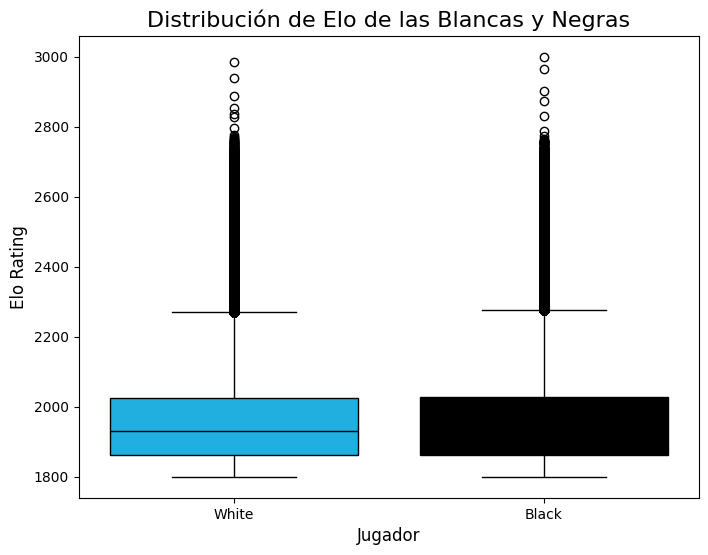

In [ ]:
# Dataframe de elos
elo_data = pd.DataFrame({
    "Elo": pd.concat([df["WhiteElo"], df["BlackElo"]]),
    "Player": ["White"] * len(df["WhiteElo"]) + ["Black"] * len(df["BlackElo"])
})

# Grafico
plt.figure(figsize=(8, 6))
sns.boxplot(x="Player", y="Elo", data=elo_data, palette={"White": "deepskyblue", "Black": "black"})

# Titulos
plt.title("Distribución de Elo de las Blancas y Negras", fontsize=16)
plt.xlabel("Jugador", fontsize=12)
plt.ylabel("Elo Rating", fontsize=12)

plt.show()


Como podemos observar la distribucion de elos es muy similar ya que las partidas suelen emparejar personas de un rango de elo similar.

### Aperturas mas utilizadas

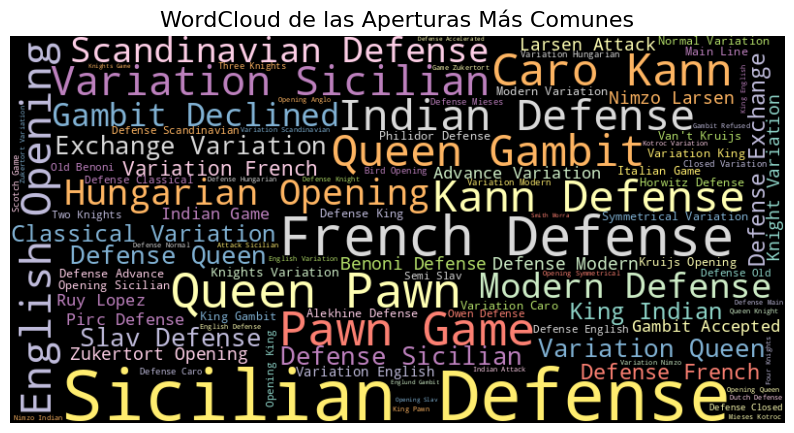

In [ ]:
# Texto de aperturas
aperturas_texto = " ".join(df["Opening"].dropna().values)

# WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="black",
    colormap="Set3",
    max_words=100
).generate(aperturas_texto)

# Visualización
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud de las Aperturas Más Comunes", fontsize=16)
plt.show()


Como observamos en el siguiente grafico wordcloud, una de las aperturas mas utilizadas o mas mencionadas en este dataframe es la Defensa Siciliana, esto tiene sentido ya que a niveles altos es muy implementada por las siguientes razones:



*  Naturaleza dinámica y agresiva
*  Flexibilidad
*  Oportunidades de desequilibrio
* Ampliamente estudiada


Esto nos da un inicio de la informacion de las aperturas y como uno puede investigar en aquellas que no son tan utilizadas o perfeccionar aun mas las comunes y ampliamente utilizadas.

A continuacion vamosa a ver un grafico que nos proporciene mas detalles cuantitativos sobre las aperturas mas utilizadas

<ipython-input-21-35a86578fa1e>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




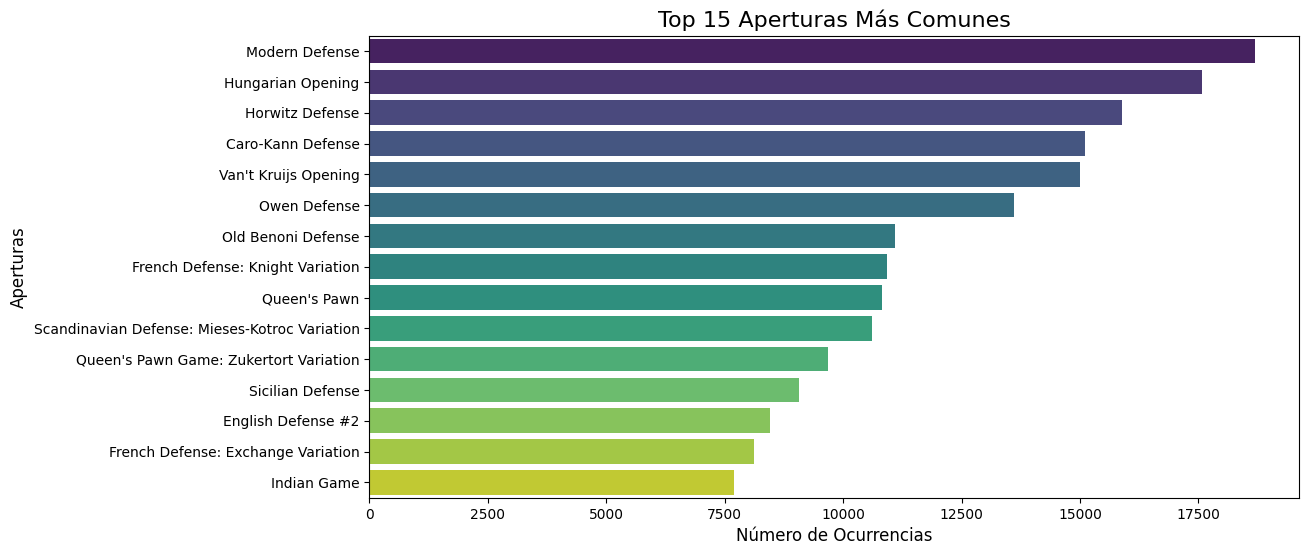

In [ ]:
# Contar las aperturas más comunes
aperturas_comunes = df["Opening"].value_counts().head(15)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    x=aperturas_comunes.values,
    y=aperturas_comunes.index,
    palette="viridis"
)

# Etiquetas y título
plt.title("Top 15 Aperturas Más Comunes", fontsize=16)
plt.xlabel("Número de Ocurrencias", fontsize=12)
plt.ylabel("Aperturas", fontsize=12)

# Mostrar gráfico
plt.show()


Como se observa tenemos una discrepancia con el grafico anterior pero esto se puede dever a que el wordcloud muestra una frecuencia relativa de las palabras en cambio el grafico de barras es una frecuencia precisa.

Esto igualmente nos devuelve varios resultados prometedores ya que a partir de esto uno puedo ver que aperturas estan utilizandose mas, cuales estan cobrando fuerza o que variantes nuevas y prometedoras puedo llegar a utilizar basandome en todas aquellas personas de un Elo considerablemente alto como los de este dataframe.

## Analisis NLP (Procesamiento del lenguaje natural)

### Importamos librerias y dependencias

Primero instalamos la libreria de NLTK

In [ ]:
!pip install nltk

Primero vamos a importar aquellas librerias para el analisis NLP, ya fueron importadas anteriormente pero para evitar error cada analisis importa sus librerias necesarias.

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

Descargamos recursos adicionales de nltk por si no los tenemos disponibles

In [ ]:
nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Configuramos la ruta correcta de los datos NLTK

In [ ]:
nltk.data.path.append(os.path.expanduser('~/nltk_data'))
nltk.data.path.append('/usr/share/nltk_data')
nltk.data.path.append('/usr/local/share/nltk_data')
nltk.data.path.append('/usr/lib/nltk_data')
nltk.data.path.append('/usr/local/lib/nltk_data')

### Tokenizamos y limpiamos

#### Tokenizacion

En este proceso vamos a tokenizar y limpiar las jugadas.

Por ejemplo una jugada en nuestro dataframe tiene este formato:

Formato original:

    1. e4 c6 2. Nc3 d5 3. Qf3 dxe4 4. Nxe4 Nd7

Formato esperado:

    [ "e4", "c6", "Nc3", "d5", "Qf3", "dxe4", "Nxe4", "Nd7"]




Como vemos logramos eliminar caracteres y numeros innecesarios para nuestro analisis.

Antes de realizar cualquier proceso de tokenizacion vamos a eliminar columnas innecesarias para evitar el consumo excesivo de ram

In [ ]:
df = df[['movetext']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999940 entries, 0 to 999999
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   movetext  999940 non-null  object
dtypes: object(1)
memory usage: 15.3+ MB


Antes de tokenizar vamos a observar si tenemos valores atipicos, evaluaciones que se filtraron en la primera limpieza o movimientos invalidos

In [ ]:
# OPbservamos una jugada
print(df.iloc[1,0])
print(df.iloc[999907,0])

1. e4 c5 2. f4 d5 3. exd5 Qxd5 4. Nc3 Qd8 5. Bc4 Bf5 6. d3 a6 7. g4 Bd7 8. a4 e6 9. Bd2 Bc6 10. Nf3 Bxf3 11. Qxf3 Qh4+ 12. Qg3 Qxg3+ 13. hxg3 Nc6 14. O-O-O O-O-O 15. f5 Ne5 16. fxe6 Nxc4 17. dxc4 fxe6 18. Rde1 Bd6 19. Bf4 Bxf4+ 20. gxf4 Nh6 21. g5 Nf5 22. Rxe6 Rd4 23. Rf1 Rxc4 24. Re5 g6 25. Kd2 Rd8+ 26. Kc1 Rd7 27. Nd5 Rd6 28. Ne7+ Nxe7 29. Rxe7 Rd7 30. Rxd7 Kxd7 31. b3 Re4 32. Kb2 Ke6 33. Kc3 Kf5 34. Rh1 Re7 35. Rf1 Re4 36. Rh1 Rxf4 37. Rxh7 Kxg5 38. Rxb7 Rf6 39. Rc7 Kf4 40. Rxc5 g5 41. b4 g4 42. Rc4+ Kf3 43. Rc5 Rg6 44. Rf5+ Kg2 45. b5 axb5 46. axb5 g3 47. Kb4 Kh1 48. Rd5 g2 49. Rd1+ g1=Q 50. Rxg1+ Kxg1 51. c4 Kf2 52. c5 Ke3 53. b6 Kd4 54. b7 Rg1 55. Kb5 Rb1+ 56. Kc6 Rb4 57. Kc7 Kxc5 58. b8=Q Rxb8 59. Kxb8 1/2-1/2
1. e4 { [%eval 0.16] } 1... c5 { [%eval 0.36] } 2. Bc4 { [%eval -0.03] } 2... e6 { [%eval -0.09] } 3. Nc3 { [%eval 0.04] } 3... a6 { [%eval 0.12] } 4. a3 { [%eval -0.11] } 4... b5 { [%eval 0.17] } 5. Ba2 { [%eval -0.08] } 5... Nc6 { [%eval -0.13] } 6. d3 { [%eval -0.13] } 

Como se observa en estos dos ejemplos contamos con caracteres innecesarios para nuestro analisis nlp, evaluaciones y resultado de las partidas.

________________________________________________________________________________________________________________________________________________________________

A continuacion vamos a construir una funcion encargada de tokenixar y eliminar caracteres innecesarios

Ademas hemos creado el codigo para que haga una tokenizacion por lotes, eso quiere decir que vamos a ir trabajando con pequeñas porciones del dataset ya que al ser muy grande esto satura la ram disponible del sistema.

In [ ]:
# Lista de patrones a eliminar
patrones_a_eliminar = [
    r'\b(0\-1|1\-0|1\/2\-1\/2)\b',  # Resultados de partida
    r'\{ \[%eval [^\]]+\] \}',  # Evaluaciones
    r'\d+\.',  # Números de movimientos (1., 2., 3., etc.)
    r'\?',  # Símbolos de calidad de movimiento
    r'\!',  # Símbolos de calidad de movimiento
    r'\!\?',  # Símbolos de calidad de movimiento
    r'\?\!',  # Símbolos de calidad de movimiento
    r'\.\.',  # Elimina los puntos '..'
]

def limpiar_y_tokenizar_optimizado(jugada):
    """
    Limpia y tokeniza el texto de jugadas.
    - Respeta las mayúsculas y minúsculas.
    - Elimina resultados de partidas (1-0, 0-1, 1/2-1/2).
    - Elimina evaluaciones como 'eval' y los números asociados.
    - Elimina símbolos de calidad de movimiento (? !).
    - Elimina puntos '..'.
    """
    # Elimina los patrones definidos
    for patron in patrones_a_eliminar:
        jugada = re.sub(patron, '', jugada)

    # Tokeniza el texto respetando mayúsculas y minúsculas
    tokens = word_tokenize(jugada)

    # Elimina tokens vacíos (por si quedaron espacios en blanco)
    tokens = [token for token in tokens if token.strip()]

    return tokens

def procesar_por_lotes(df, batch_size, output_file):
    """
    Procesa un DataFrame en lotes para aplicar la limpieza y tokenización de forma eficiente.

    Args:
        df (DataFrame): DataFrame a procesar.
        batch_size (int): Tamaño del lote a procesar.
        output_file (str): Nombre del archivo donde se guardará el resultado procesado.
    """
    total_rows = len(df)
    for start in range(0, total_rows, batch_size):
        end = start + batch_size
        batch = df.iloc[start:end]

        # Limpia y tokeniza la columna 'movetext' del batch
        batch['movetext'] = batch['movetext'].apply(limpiar_y_tokenizar_optimizado)

        # Guarda el batch procesado en el archivo de salida (apendiendo)
        mode = 'a' if start > 0 else 'w'  # Usa 'w' para el primer batch y 'a' para los demás
        header = (start == 0)  # Solo incluye el encabezado en el primer batch
        batch.to_csv(output_file, mode=mode, index=False, header=header)

        print(f"Procesadas filas {start} a {min(end, total_rows)} de {total_rows}")

# Define el tamaño del lote y el archivo de salida
batch_size = 100000  # Puedes ajustar el tamaño del lote según el rendimiento
output_file = 'movimientos_tokenizados.csv'

# Procesa el DataFrame en lotes
procesar_por_lotes(df, batch_size, output_file)


<ipython-input-29-b61712078378>:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Procesadas filas 0 a 100000 de 999940
Procesadas filas 100000 a 200000 de 999940
Procesadas filas 200000 a 300000 de 999940
Procesadas filas 300000 a 400000 de 999940
Procesadas filas 400000 a 500000 de 999940
Procesadas filas 500000 a 600000 de 999940
Procesadas filas 600000 a 700000 de 999940
Procesadas filas 700000 a 800000 de 999940
Procesadas filas 800000 a 900000 de 999940
Procesadas filas 900000 a 999940 de 999940


Ahora que obtuvimos un csv vamos a volver pasarlo a dataframe

In [ ]:
df_Tokenizado=pd.read_csv("/content/movimientos_tokenizados.csv")

Comparamos como quedan dos jugadas sin tokenizay y filtrar caracteres, contra nuestro dataset filtrado.

In [ ]:
print(df.iloc[1,0])
print(df.iloc[999907,0])
print('----------------------------------------------------')
print(df_Tokenizado.iloc[1,0])
print(df_Tokenizado.iloc[999907,0])

1. e4 c5 2. f4 d5 3. exd5 Qxd5 4. Nc3 Qd8 5. Bc4 Bf5 6. d3 a6 7. g4 Bd7 8. a4 e6 9. Bd2 Bc6 10. Nf3 Bxf3 11. Qxf3 Qh4+ 12. Qg3 Qxg3+ 13. hxg3 Nc6 14. O-O-O O-O-O 15. f5 Ne5 16. fxe6 Nxc4 17. dxc4 fxe6 18. Rde1 Bd6 19. Bf4 Bxf4+ 20. gxf4 Nh6 21. g5 Nf5 22. Rxe6 Rd4 23. Rf1 Rxc4 24. Re5 g6 25. Kd2 Rd8+ 26. Kc1 Rd7 27. Nd5 Rd6 28. Ne7+ Nxe7 29. Rxe7 Rd7 30. Rxd7 Kxd7 31. b3 Re4 32. Kb2 Ke6 33. Kc3 Kf5 34. Rh1 Re7 35. Rf1 Re4 36. Rh1 Rxf4 37. Rxh7 Kxg5 38. Rxb7 Rf6 39. Rc7 Kf4 40. Rxc5 g5 41. b4 g4 42. Rc4+ Kf3 43. Rc5 Rg6 44. Rf5+ Kg2 45. b5 axb5 46. axb5 g3 47. Kb4 Kh1 48. Rd5 g2 49. Rd1+ g1=Q 50. Rxg1+ Kxg1 51. c4 Kf2 52. c5 Ke3 53. b6 Kd4 54. b7 Rg1 55. Kb5 Rb1+ 56. Kc6 Rb4 57. Kc7 Kxc5 58. b8=Q Rxb8 59. Kxb8 1/2-1/2
1. e4 { [%eval 0.16] } 1... c5 { [%eval 0.36] } 2. Bc4 { [%eval -0.03] } 2... e6 { [%eval -0.09] } 3. Nc3 { [%eval 0.04] } 3... a6 { [%eval 0.12] } 4. a3 { [%eval -0.11] } 4... b5 { [%eval 0.17] } 5. Ba2 { [%eval -0.08] } 5... Nc6 { [%eval -0.13] } 6. d3 { [%eval -0.13] } 

#### Limpieza del entorno

Guardamos el dataframe generado para evitar perdidas

Lo descargamos de manera local

In [ ]:
from google.colab import files
# Descargamos el archivo
files.download("movimientos_tokenizados.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Este codigo de acontinuacion nos sirve para ver que uso de ram tenemos y que podemos borrar, esto lo hacemos ya que al trabajar con grandes volumenes de datos. En lo posible buscamos que nuestro entorno de trabajo tenga la mejor performance, y ya que hemos descargado millones de datos, analizado y tokenizado en estos entornos tan reducidos se suele acabar rapidamente la ram.

Asi que una de las opciones es analizar que variables ya no estamos utilizando y eliminarlas.

In [ ]:
%whos

Variable              Type               Data/Info
--------------------------------------------------
OUTPUT_FILE           str                filtered_data.csv
SAVE_INTERVAL         int                100000
TARGET_COUNT          int                1000000
TEMP_FILE             str                filtered_data_temp.csv
WordCloud             type               <class 'wordcloud.wordcloud.WordCloud'>
aperturas_comunes     Series             Opening\nModern Defense  <...>Name: count, dtype: int64
aperturas_texto       str                Caro-Kann Defense: Goldma<...>Variation Horwitz Defense
black_elo             int                1848
colors                dict               n=3
csv                   module             <module 'csv' from '/usr/lib/python3.11/csv.py'>
dataset               IterableDataset    IterableDataset({\n    fe<...>    num_shards: 25542\n})
df                    DataFrame                                   <...>[999940 rows x 1 columns]
df_nan                DataFr

Limpieza del entorno

In [ ]:
# Eliminar variables innecesarias
# del dataset, df_nan, filtered_data, f, i, row, total_saved, fig
# del elo_data

# Forzar la liberación de memoria
import gc
gc.collect()

600

### Analisis

Analizaremos los movimientos mas comunes en el ajedrez, esto nos permitira ver que jugadas son mas frecuents en general.

#### Frecuencia de movimientos

Vamos a extraer los movimientos para convertirlos en una jugada y de ahi analizarlos

In [ ]:
import ast
from itertools import chain

# Crear una lista vacía para almacenar los movimientos
all_moves = []

# Definir el tamaño de chunk
chunk_size = 100000

# Procesar en chunks
for i in range(0, len(df_Tokenizado), chunk_size):
    chunk = df_Tokenizado.iloc[i:i + chunk_size]  # Seleccionar el chunk actual
    # Aplanar y agregar los movimientos del chunk a la lista
    moves_chunk = list(chain.from_iterable(chunk['movetext'].apply(ast.literal_eval)))
    all_moves.extend(moves_chunk)  # Agregar los movimientos a la lista principal

# Ver los resultados
print(f"Ejemplo de los primeros movimientos: {all_moves[:10]}")
print(f"Total de movimientos: {len(all_moves)}")


Ejemplo de los primeros movimientos: ['e4', 'c6', 'Nc3', 'd5', 'Qf3', 'dxe4', 'Nxe4', 'Nd7', 'Bc4', 'Ngf6']
Total de movimientos: 75693257


Como vemos cada codigo que utilizamos lo hacemos en bloques ya que es un dataset uy grande y esto consume muchos recursos, luego de ejecutar este codigo obtenemos una muestra de los movimientos aplanados y que en total nuestro dataset cuenta con:



*   75.693.257 movimientos



Ahora vamos a proceder a contar la frecuiencia de los movimientos

In [ ]:
# Contador para los movimientos
move_counter = Counter()

# Procesar en chunks
for i in range(0, len(df_Tokenizado), chunk_size):
    chunk = df_Tokenizado.iloc[i:i + chunk_size]  # Seleccionar el chunk actual
    moves_chunk = list(chain.from_iterable(chunk['movetext'].apply(ast.literal_eval)))  # Convertir a listas
    move_counter.update(moves_chunk)  # Actualizar el contador con los movimientos del chunk

# Obtener los movimientos más frecuentes
most_common_moves = move_counter.most_common(20)

# Mostrar los movimientos más frecuentes
print("Movimientos más jugados:")
for move, count in most_common_moves:
    print(f"{move}: {count}")


Movimientos más jugados:
O-O: 1479262
Nf3: 1003321
d4: 975330
Nf6: 957208
e4: 927072
d5: 875827
e5: 807327
Nc3: 778382
c5: 702090
Nc6: 698155
c4: 661842
e6: 629562
f4: 554895
f5: 496180
g6: 481709
b5: 460151
d6: 452179
h3: 451076
Be7: 447847
Bd3: 441198


Como vemos tenemos un ejemplo de cuales serian los movimientos mas jugados en ajedrez, ahora veremos un grafico mas intuitivo

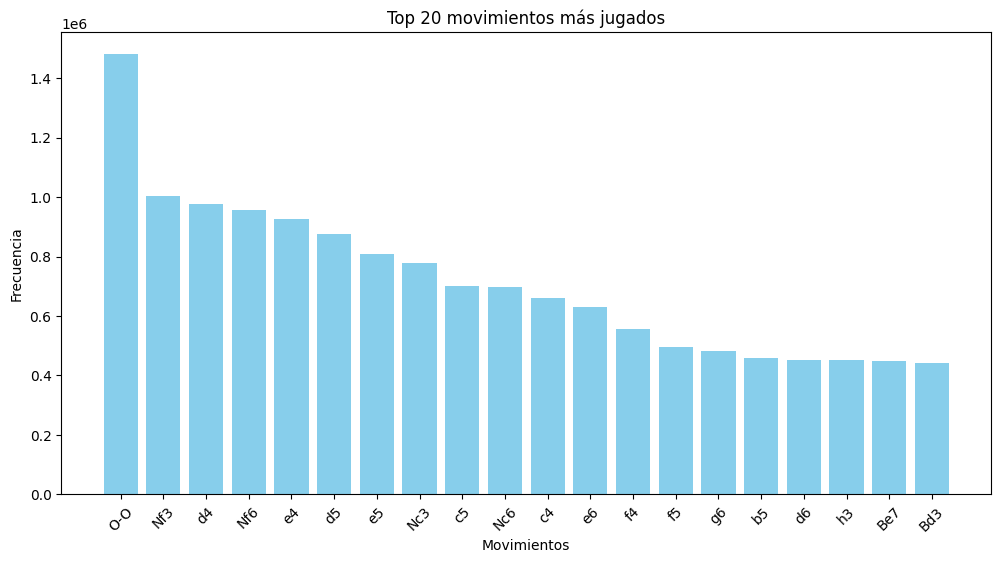

In [ ]:
# Preparar los datos para el gráfico
moves, counts = zip(*most_common_moves)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(moves, counts, color='skyblue')
plt.xlabel("Movimientos")
plt.ylabel("Frecuencia")
plt.title("Top 20 movimientos más jugados")
plt.xticks(rotation=45)
plt.show()


Como vemos en este grafico uno de los movimientos mas jugados en nuestro datasets es O-O, que respresenta el enroque corto.

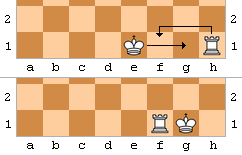

Este seria el ejemplo de enroque corto

Y los tres movimientos que siguen es muy logico que sean esos ya que son variantes de muchas aperturas o defensas, por ejemplo:
* Nf3: Caballo a f3 (knight a f3)
* d4: Peon a d4
* Nf6: Caballo a f6 (Knight a f6)

Para el ejemplo de Nf3, es muy jugado en posiciones defensivas y muchas variantes utilizan ese movimiento, como:
* Defensa Caro-Kann: 1.e4 c6  2.*Nf3* d5  3.d4
* Defensa Francesa: 1.e4 e6  2.*Nf3* d5
* Defensa Pirc: 1.e4 d6  2.*Nf3* g6
* Defensa Alekhine: 1.e4 Nf6  2.e5 Nd5
* Defensa Moderna: 1.e4 d5  2.*Nf3 *c6

Como vemos muchas de las defensas mas jugadas o aperturas, que asi mismo podemos encontrar en nuestro grafico Wordcloud, implican utilziar el movimiento Nf3

#### Secuencias mas comunes en el medio juego

Como ya tenemos aperturas, defenesas y movimientos unicos mas jugados.

Con eso tendriamos buena informacion para un gran comienzo de partida, pero ahora nos encontramos con otra parte importante, que es la mitad de partida o el medio juego.

 En este momemto es donde se va a decidir como es el transcurso de la partida, que ritmo llevara, que estilos se juegan y como cada jugador llega al final.

 De esto podemos obtener muy buena informacion para generar nuestro modelo, y que logre aprender aquellos movimientos decisivos para el medio juego.

In [ ]:
# Función para extraer los movimientos del medio juego
def obtener_medio_juego(movetext):
    # Convertir la cadena de texto en lista y tomar los movimientos del 5 al 20 (indices 4 a 19)
    try:
        movimientos = ast.literal_eval(movetext)
        return ' '.join(movimientos[4:20])  # Movimientos del 5 al 20
    except:
        return ''

# Crear una nueva columna con las secuencias de medio juego
df_Tokenizado['medio_juego'] = df_Tokenizado['movetext'].apply(obtener_medio_juego)

# Usar chunks para evitar sobrecargar la RAM
chunk_size = 100000  # tamaño de chunk
medio_juego_counter = Counter()

# Procesar en chunks
for start in range(0, len(df_Tokenizado), chunk_size):
    end = start + chunk_size
    chunk = df_Tokenizado.iloc[start:end]
    medio_juego_counter.update(chunk['medio_juego'])

# Ver las 10 secuencias más comunes
top_medio_juego = medio_juego_counter.most_common(10)
print("Top 10 secuencias de medio juego más comunes:")
for secuencia, frecuencia in top_medio_juego:
    print(f"{secuencia}: {frecuencia} veces")


Top 10 secuencias de medio juego más comunes:
: 5116 veces
d4 cxd4 Nxd4 Nf6 Nc3 e5 Ndb5 d6 Bg5 a6 Na3 b5 Nd5 Be7 Bxf6 Bxf6: 210 veces
Bb5 a6 Ba4 Nf6 O-O Be7 Rfe1 b5 Bb3 O-O c3 d5 exd5 Nxd5 Nxe5 Nxe5: 186 veces
Nc3: 99 veces
d4 cxd4 Nxd4 e5 Nb5 d6 Nb1c3 a6 Na3 b5 Nd5 Nf6 Bg5 Be7 Bxf6 Bxf6: 92 veces
Bb5 a6 Ba4 Nf6 O-O Be7 Re1 b5 Bb3 O-O c3 d5 exd5 Nxd5 Nxe5 Nxe5: 86 veces
Bb5 a6 Ba4 Nf6 O-O Be7 Rfe1 b5 Bb3 d6 c3 O-O h3 Na5 Bc2 c5: 83 veces
d4 cxd4 Nxd4 Nf6 Nc3 e5 Ndb5 d6 Bg5 a6 Na3 b5 Bxf6 gxf6 Nd5 f5: 78 veces
Bc4 Nf6 Ng5 d5 exd5 Na5 Bb5+ c6 dxc6 bxc6 Be2 h6 Nf3 e4 Ne5 Bd6: 73 veces
Nf3: 69 veces


In [ ]:
top_medio_juego

[('', 5116),
 ('d4 cxd4 Nxd4 Nf6 Nc3 e5 Ndb5 d6 Bg5 a6 Na3 b5 Nd5 Be7 Bxf6 Bxf6', 210),
 ('Bb5 a6 Ba4 Nf6 O-O Be7 Rfe1 b5 Bb3 O-O c3 d5 exd5 Nxd5 Nxe5 Nxe5', 186),
 ('Nc3', 99),
 ('d4 cxd4 Nxd4 e5 Nb5 d6 Nb1c3 a6 Na3 b5 Nd5 Nf6 Bg5 Be7 Bxf6 Bxf6', 92),
 ('Bb5 a6 Ba4 Nf6 O-O Be7 Re1 b5 Bb3 O-O c3 d5 exd5 Nxd5 Nxe5 Nxe5', 86),
 ('Bb5 a6 Ba4 Nf6 O-O Be7 Rfe1 b5 Bb3 d6 c3 O-O h3 Na5 Bc2 c5', 83),
 ('d4 cxd4 Nxd4 Nf6 Nc3 e5 Ndb5 d6 Bg5 a6 Na3 b5 Bxf6 gxf6 Nd5 f5', 78),
 ('Bc4 Nf6 Ng5 d5 exd5 Na5 Bb5+ c6 dxc6 bxc6 Be2 h6 Nf3 e4 Ne5 Bd6', 73),
 ('Nf3', 69)]

Como vemos en el siguueinte dataframe, parece ser que muchos de los movimientos del medio juego estan enlazadados a Alfiles,Caballos y Peones.

#### Duracion de las partidas

Ya sabiendo que aperturas y defensas suelen ser las mas jugadas, entendiendo los movimientos mas frecuentes y aquellos que se juegan mas en el medio juego.

Otro factor a considerar es entener en promedio cuanto suelen durar las partidas en cuanto a movimientos, esto nos ayudara a darle buenas intrucciones a nuestro modelo, ya que al utilizar un arquitecura que no tiene demasiada memoria es importante entender sus limitaciones y una de ellas seria la cantidad de movimientos.

In [ ]:
# Función para obtener la duración de cada partida
def obtener_duracion(movetext):
    try:
        movimientos = ast.literal_eval(movetext)
        return len(movimientos)
    except:
        return 0

df_Tokenizado['duracion'] = df_Tokenizado['movetext'].apply(obtener_duracion)

# Ver los primeros resultados
print(df_Tokenizado[['duracion']].head())


   duracion
0        94
1       117
2        74
3        93
4        56


A continuacion vamos a ver una descripcion estadistica sobre la duracion de las partidas en cuanto a movimientos

In [ ]:
print(df_Tokenizado['duracion'].describe())

count    999940.000000
mean         75.697799
std          31.469431
min           1.000000
25%          54.000000
50%          73.000000
75%          95.000000
max         371.000000
Name: duracion, dtype: float64


Como vemos estadisticamente de nuestro dataset, obtenemos que de media las partidas suelen durar 75 movimientos.

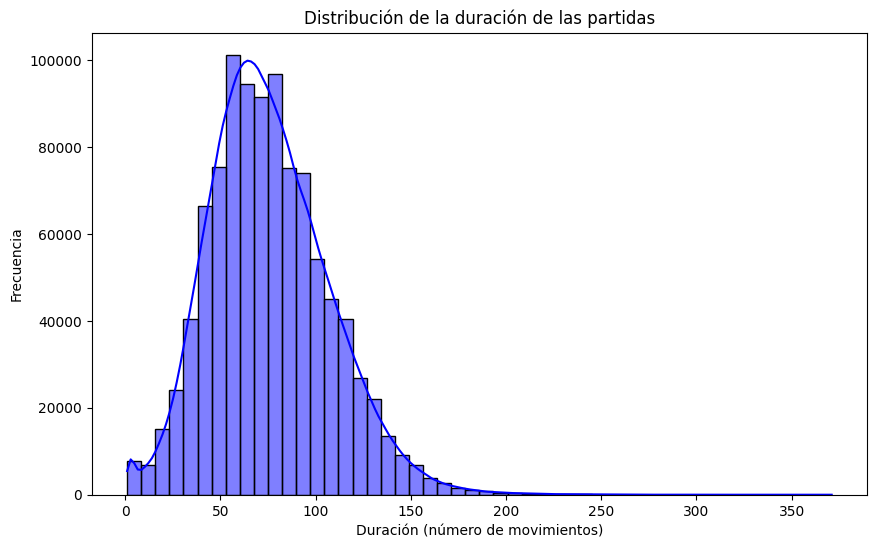

In [ ]:
# Graficar la distribución de la duración de las partidas
plt.figure(figsize=(10, 6))
sns.histplot(df_Tokenizado['duracion'], kde=True, color='blue', bins=50)
plt.title("Distribución de la duración de las partidas")
plt.xlabel("Duración (número de movimientos)")
plt.ylabel("Frecuencia")
plt.show()


Como vemos en este grafico que es un poco mas intuitivo, la duracion suelen rondar entre los 50 a 90 movimientos, esto tiene varios factores que se desarollan durante el medio juego, pero va muy acorde a la realidad ya que por diversas reglas del juego una partida seria improbable que durar mucho mas, y esto lo respalda los graficos, tambien hay varios factores que hacen que las partidas tengan esta duracion.
Ya que las aperturas en promedio suelen rondar mas de 15 movimientos, y si a esto le sumamos el medio juego y el final obtenemos aproximadamente el promedio revelado por los graficos.

## Modelo

Como vimos anteriormente, ya generamos un datasets lo suficientemente grande para entrenar un modelo de red neuronal que sea capaz de predecir la siguiente jugada.

Como esto es un proyecto pequeño no buscamos que la jugada sea la mejor ya que el unico insight que va a tener el modelo son todas las jugadas, no contamos con valoracion de pieza, evaluacion de movimiento, resultados,etc.

Con esto buscamos practicar el uso de las Redes Neuronales.

Para ello vamos a hacer uso de otro colab enlazado a continuacion.

¿Por qué no continuar con este Colab?

* Durante el proceso de obtención, filtrado y análisis de los datos, noté que el entorno proporcionado por Google Colab es bastante limitado en cuanto a capacidades de RAM. Esto complicó el trabajo con datasets grandes, pero, mediante el uso de lotes y dividiendo el dataset, logramos completar el análisis y filtrado de los datos.

* Para obtener los mejores resultados en las siguientes etapas, decidimos crear un Colab separado donde ejecutaremos el embedding y la red neuronal recurrente. Esto nos permitirá aprovechar al máximo la RAM disponible y la GPU para optimizar el rendimiento del modelo.

[ProyectoDS3_RNN_Nahuel_Ghilardi](https://colab.research.google.com/drive/1cuKM4j46nXwCPR4WZRsuJS4Q3SoDz1Hz?usp=sharing)